# Assignment 1: Data Parsing, Cleansing and Integration
## Task 1 and 2
#### Student Name: XXXX XXXX
#### Student ID: 000000

Date: XXXX

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy

## Introduction
Brief information of this assessment, e.g., what problems were this assessment tackling, what problems were discovered in the data while you were parsing or cleansing it, and the approaches you chose to handle them, etc.

<span style="color: red"> Note that this is a sample notebook only. You will need to fill in the proper markdown and code blocks. You might also want to make necessary changes to the structure to meet your own needs. Note also that any generic comments written in this notebook are to be removed and replace with your own words.</span>

## Importing libraries 

In [1]:
# importing libraries needed for this assessment
import xml.etree.ElementTree as ET
import pandas as pd

# Loading the XML data
tree = ET.parse('s3970066_dataset1.xml')
root = tree.getroot()

## Task 1. Parsing Data

### 1.1. Examining and loading data
Examine "\<student\_id\>_dataset1.xml" to determine its content and structure, then load it into Python. Explain your findings here, e.g., how are the records are stored? 

In [2]:
import xml.etree.ElementTree as ET
import pandas as pd

def format_date(dt):
    """Transform the date format for OpenDate and CloseDate."""
    formatted_dt = f"{dt[6:8]}-{dt[4:6]}-{dt[0:4]} {dt[9:11]}:{dt[11:13]}:{dt[13:15]}"
    return formatted_dt

# 1. Parsing the XML file
tree = ET.parse('s3970066_dataset1.xml')
root = tree.getroot()

# Initializing the list to hold all the job records
data = []

# 2. Iterating through 'Source' and then 'Job'
for source in root.findall('./Source'):
    source_name = source.attrib['SrcName']
    
    for job in source.findall('./Job'):
        record = {}
        record['Id'] = job.attrib['ID']  # retrieving the ID attribute
        record['SourceName'] = source_name  # adding the source name to each record
        
        for attribute in job:
            # handling date formatting for specific tags
            if attribute.tag in ["OpenDate", "CloseDate"]:
                record[attribute.tag] = format_date(attribute.text)
            else:
                record[attribute.tag] = attribute.text
                
        data.append(record)

# 3. constructing a DataFrame
df = pd.DataFrame(data)

# 4. verifying the DataFrame columns
expected_columns = set(["Id", "Title", "Location", "Company", "ContractType", "ContractTime", "Category", "Salary", "OpenDate", "CloseDate", "SourceName"])
actual_columns = set(df.columns)

missing_columns = expected_columns - actual_columns
extra_columns = actual_columns - expected_columns

if missing_columns or extra_columns:
    print("Warning: Column mismatch detected!")
    if missing_columns:
        print(f"Missing Columns: {missing_columns}")
    if extra_columns:
        print(f"Extra Columns: {extra_columns}")

# 5. checking the top 59 records to ensure the tweaking has has an effect
print(df.head(59))

          Id    SourceName                                              Title  \
0   71593954  jobserve.com  Ruby on Rails Web Developer  CONTRACT  Online ...   
1   71335415  jobserve.com      Agile Data Engineer  Big Data  Central London   
2   71592855  jobserve.com                   SAP Project Assistant Accountant   
3   70248093  jobserve.com                                 C Senior Developer   
4   70247297  jobserve.com                               Web/Automated Tester   
5   71335326  jobserve.com                       Risk Manager/Risk Consultant   
6   71774452  jobserve.com                Data Architect  Data Quality London   
7   71774549  jobserve.com              Informatica Developer  Finance London   
8   68495961  jobserve.com                                    KYC/AML Analyst   
9   68496556  jobserve.com  Java J****EE Developer (Struts, JSP, HTML)  Ch...   
10  71774289  jobserve.com  C++ Embedded Software Engineer C++,RTOS(Fortun...   
11  68628222  jobserve.com  

In [3]:
import xml.etree.ElementTree as ET
import pandas as pd

def format_date(dt):
    """Transform the date format for OpenDate and CloseDate."""
    formatted_dt = f"{dt[6:8]}-{dt[4:6]}-{dt[0:4]} {dt[9:11]}:{dt[11:13]}:{dt[13:15]}"
    return formatted_dt

# creating an error logging function
error_list = []

def log_error(index, job_id, column_name, original, modified, error_type):
    error = {
        "indexOfdf": index,
        "Id": job_id,
        "ColumnName": column_name,
        "Original": original,
        "Modified": modified,
        "ErrorTyp": error_type
    }
    error_list.append(error)

# 1. parsing the XML file into the notebook
tree = ET.parse('s3970066_dataset1.xml')
root = tree.getroot()

# initializing the list to hold all job records
data = []

# 2. iterating through 'Source' and then 'Job'
for source in root.findall('./Source'):
    source_name = source.attrib['SrcName']
    
    for job in source.findall('./Job'):
        record = {}
        
        # checking for ID attribute
        if 'ID' in job.attrib:
            record['Id'] = job.attrib['ID']
        else:
            log_error(None, None, "Id", None, None, 'Missing Values')
            continue  # skipping this job record if no ID
        
        record['SourceName'] = source_name  # adding the source name to each record
        
        for attribute in job:
            # handling the date formatting for specific tags
            if attribute.tag in ["OpenDate", "CloseDate"]:
                original_value = attribute.text
                formatted_value = format_date(attribute.text)
                record[attribute.tag] = formatted_value
                if original_value != formatted_value:
                    log_error(None, record['Id'], attribute.tag, original_value, formatted_value, 'Date Format Fix')
            else:
                record[attribute.tag] = attribute.text
                
        data.append(record)

# 3. constructing a DataFrame
df = pd.DataFrame(data)

# 4. verifying the DataFrame columns
expected_columns = set(["Id", "Title", "Location", "Company", "ContractType", "ContractTime", "Category", "Salary", "OpenDate", "CloseDate", "SourceName"])
actual_columns = set(df.columns)

missing_columns = expected_columns - actual_columns
extra_columns = actual_columns - expected_columns

if missing_columns:
    for col in missing_columns:
        log_error("ALL", "ALL", col, None, None, 'Missing Column')

if extra_columns:
    for col in extra_columns:
        log_error("ALL", "ALL", col, None, None, 'Extra Column')

# 5. checking the top records
print(df.head(5))

# 6. saving the error list to CSV
error_df = pd.DataFrame(error_list)
error_df.to_csv('s3970066_errorlist.csv', index=False)


         Id    SourceName                                              Title  \
0  71593954  jobserve.com  Ruby on Rails Web Developer  CONTRACT  Online ...   
1  71335415  jobserve.com      Agile Data Engineer  Big Data  Central London   
2  71592855  jobserve.com                   SAP Project Assistant Accountant   
3  70248093  jobserve.com                                 C Senior Developer   
4  70247297  jobserve.com                               Web/Automated Tester   

         Location                  Company ContractType ContractTime Category  \
0          London  NST Recruitment Limited            -     contract  IT Jobs   
1  Central London           Oliver Bernard            -     contract  IT Jobs   
2              UK          ABW Recruitment            -     contract  IT Jobs   
3           Essex      Highams Recruitment            -    permanent  IT Jobs   
4       Horsforth               iSource IT            -    permanent  IT Jobs   

  Salary             OpenDate   

In [4]:
df['Salary'] = df['Salary'].astype('str')

In [5]:
import re
#checking the different formats Salary is appearing in the dataset
non_digit_chars = df['Salary'].apply(lambda x: re.findall(r'\D+|\s',x))
non_digit_chars.astype('str').value_counts()

[]                    47638
['nan']                 716
['-']                   707
['N/A']                 592
['.']                   439
[' ']                   201
[' to ']                100
['/year']               100
[' perAnnum']           100
['k']                    50
[' ~  ']                 30
[' ~ ']                  30
['  -  ']                30
['.', ' p/h']            10
['.', ' per hour']       10
Name: Salary, dtype: int64

In [6]:
import numpy as np

def convert_salary(salary):
    # trying to handling NaN and empty strings
    if pd.isna(salary) or salary in ["nan", "N/A", "-", "", None]:
        return np.nan

    # removing any additional spaces and convert to lowercase for uniformity
    salary = salary.replace(" ", "").lower()
    
    # handling per annum salary ranges
    if 'to' in salary:
        low, high = map(int, salary.split('to'))
        return (low + high) / 2
    
    # handling per annum salaries
    if 'perannum' in salary or '/year' in salary:
        return int(salary.replace("perannum", "").replace("/year", ""))
    
    # handling salary in 'k' units (e.g., 60k)
    if 'k' in salary:
        return int(salary.replace("k", "")) * 1000
    
    # handling hourly rates
    if 'p/h' in salary or 'perhour' in salary:
        hourly_rate = float(salary.replace("p/h", "").replace("perhour", "").replace(".", ""))
        return int(hourly_rate * 2080)  # converting to per annum
    
    # handling other numerical salaries (assuming they are already per annum)
    if salary.isdigit():
        return int(salary)
    
    # if salary doesn't match any of these formats, I will set it to NaN
    return np.nan

# converting all salaries to a standardized per annum format
df['Salary'] = df['Salary'].apply(convert_salary)


In [7]:
# importing regular expression library
import re

# converting the Salary column to string type for regex matching
df['Salary'] = df['Salary'].astype('str')

# applying a regex to each salary to identify any non-digit characters
# since we are only interested in integers at this point, we can use this simple regex
non_digit_chars = df['Salary'].apply(lambda x: re.findall(r'\D', x))

# counting the occurrences of each unique set of non-digit characters
counts = non_digit_chars.astype('str').value_counts()

print(counts)


['.']              48008
['n', 'a', 'n']     2745
Name: Salary, dtype: int64


In [8]:
import numpy as np

# converting NaNs back to NumPy NaN
df.loc[df['Salary'] == 'nan', 'Salary'] = np.nan

# removing periods from the Salary strings
df['Salary'] = df['Salary'].str.replace('.', '')

# converting cleaned salary to float first, in case there are decimals, and then to integers
# we are using float first to handle any potential NaN values
df['Salary'] = df['Salary'].astype(float).astype('Int64', errors='ignore')

# verifying if the issues are resolved
non_digit_chars = df['Salary'].astype('str').apply(lambda x: re.findall(r'\D', x))
counts = non_digit_chars.astype('str').value_counts()
print(counts)


/var/folders/8y/9bzf6lrd1kggm5429dypyz2r0000gn/T/ipykernel_74980/418716136.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Salary'] = df['Salary'].str.replace('.', '')


[]                      48008
['<', 'N', 'A', '>']     2745
Name: Salary, dtype: int64


In [9]:
import numpy as np
import re
import pandas as pd

# converting Salary column to string type for string operations
df['Salary'] = df['Salary'].astype(str)

# replacing 'N/A', 'nan', '<NA>' etc. with np.nan
df['Salary'] = df['Salary'].replace(['N/A', 'nan', '<NA>', 'None'], np.nan)

# removing the periods, and any other symbols you don't need.
df['Salary'] = df['Salary'].str.replace(r'[^\d.]', '', regex=True)

# replacing empty strings with np.nan
df['Salary'].replace('', np.nan, inplace=True)

# converting to float first and then to integers
# using float first to handle any potential NaN values
df['Salary'] = df['Salary'].apply(pd.to_numeric, errors='coerce').astype('Int64', errors='ignore')

# verifying if the issues are resolved
non_digit_chars = df['Salary'].astype(str).apply(lambda x: re.findall(r'\D+', x))
counts = non_digit_chars.astype(str).value_counts()
print(counts)


[]          48008
['<NA>']     2745
Name: Salary, dtype: int64


In [10]:
import pandas as pd
import re
import numpy as np

df['Salary'] = df['Salary'].astype(str)  # converting to string for regex operations

#here i am identifying the salarry pattern if it is unknown
def identify_salary_pattern(salary_str):
    if re.search(r'k', salary_str, re.IGNORECASE):
        return 'in_k'
    elif re.search(r'p/h', salary_str, re.IGNORECASE) or re.search(r'per hour', salary_str, re.IGNORECASE):
        return 'per_hour'
    elif re.search(r'perAnnum', salary_str, re.IGNORECASE) or re.search(r'/year', salary_str, re.IGNORECASE):
        return 'per_year'
    elif re.search(r'to', salary_str, re.IGNORECASE):
        return 'range'
    else:
        return 'unknown'

df['SalaryPattern'] = df['Salary'].apply(identify_salary_pattern)

# checking every unique pattern that is found
print(df['SalaryPattern'].value_counts())


unknown    50753
Name: SalaryPattern, dtype: int64


In [11]:
# converting all salaries to per-annum format
def convert_to_per_annum(salary_str, pattern):
    if pattern == 'in_k':
        return float(re.sub(r'[^\d.]', '', salary_str)) * 1000  # 'k' usually means 'thousand' in this case
    elif pattern == 'per_hour':
        return float(re.sub(r'[^\d.]', '', salary_str)) * 2080  # 2080 working hours in a year so multiplying per hour to year
    elif pattern == 'per_year':
        return float(re.sub(r'[^\d.]', '', salary_str))  # if it is already in per annum, not changing it
    elif pattern == 'range':
        numbers = list(map(float, re.findall(r'\d+', salary_str)))
        return np.mean(numbers)  # averaging the range
    else:
        return np.nan  # returning NaN for unknown patterns or already clean numbers

# applying the conversion function to the DataFrame
df['AnnualSalary'] = df.apply(lambda row: convert_to_per_annum(row['Salary'], row['SalaryPattern']), axis=1)

# droping the 'SalaryPattern' column as it's no longer needed
df.drop(columns=['SalaryPattern'], inplace=True)

# now, df['AnnualSalary'] should contain all salaries in a per-annum format


In [12]:
print(df['AnnualSalary'].unique())


[nan]


In [13]:
#checking the Salary and AnnualSalary columns
print(df[['Salary', 'AnnualSalary']].sample(59))


       Salary  AnnualSalary
18821  150000           NaN
17388  182400           NaN
34947  350000           NaN
19025  475000           NaN
43580  380000           NaN
37316  250000           NaN
27122    <NA>           NaN
23282  255000           NaN
1812   225000           NaN
12310  211200           NaN
2974   265000           NaN
36625  142560           NaN
5456   550000           NaN
3700   360000           NaN
18418    <NA>           NaN
16743  425000           NaN
22577  177500           NaN
21061  326400           NaN
28994  576000           NaN
32263  350000           NaN
22414  210000           NaN
3791   800000           NaN
15394  170000           NaN
18127  118840           NaN
40692  275000           NaN
28210  119420           NaN
32959  576000           NaN
811    700000           NaN
27430  275000           NaN
2417   104160           NaN
22374  325000           NaN
23832  300000           NaN
4264   192000           NaN
231    425000           NaN
3143   250000       

In [14]:
#checking the cilumn types here
print(df.dtypes)


Id               object
SourceName       object
Title            object
Location         object
Company          object
ContractType     object
ContractTime     object
Category         object
Salary           object
OpenDate         object
CloseDate        object
AnnualSalary    float64
dtype: object


In [15]:
print(df['Salary'].isna().sum())
#checking the Salary values to ensure there no invalid records

0


In [16]:
import pandas as pd
import numpy as np
import re
import csv

# creating the error logging function as before
error_list = []

def log_error(index, job_id, column_name, original, modified, error_type):
    error = {
        "indexOfdf": index,
        "Id": job_id,
        "ColumnName": column_name,
        "Original": original,
        "Modified": modified,
        "ErrorTyp": error_type
    }
    error_list.append(error)

def convert_to_annual(salary, index, job_id):
    if pd.isna(salary):
        return np.nan
    
    original = salary
    salary = str(salary).replace(',', '').strip()
    
    # checking if the salary is already in annual format
    if salary.endswith('/year') or salary.endswith('perAnnum'):
        return float(re.sub('[^0-9.]', '', salary))
    
    # converting the hourly salary to annual (assuming 40-hour work week, 52 weeks)
    if salary.endswith('per hour') or salary.endswith('p/h'):
        modified = float(re.sub('[^0-9.]', '', salary)) * 40 * 52
        log_error(index, job_id, 'Salary', original, modified, 'Salary-mismatch')
        return modified
    
    # converting the monthly salary to annual (assuming 12 months)
    if salary.endswith('/month'):
        modified = float(re.sub('[^0-9.]', '', salary)) * 12
        log_error(index, job_id, 'Salary', original, modified, 'Salary-mismatch')
        return modified
    
    # handling salary ranges by averaging the two endpoints
    if 'to' in salary or '-' in salary:
        low, high = map(float, re.findall(r'\d+', salary))
        modified = (low + high) / 2
        log_error(index, job_id, 'Salary', original, modified, 'Salary-mismatch')
        return modified
    
    # handle the 'k' for thousand
    if 'k' in salary:
        modified = float(re.sub('[^0-9.]', '', salary)) * 1000
        log_error(index, job_id, 'Salary', original, modified, 'Salary-mismatch')
        return modified
    
    # if nothing matches, this return as is
    try:
        return float(salary)
    except ValueError:
        log_error(index, job_id, 'Salary', original, np.nan, 'Salary-mismatch')
        return np.nan

# spplying the conversion function to each record and log errors
df['AnnualSalary'] = df.apply(lambda row: convert_to_annual(row['Salary'], row.name, row['Id']), axis=1)

# appending the new error list to the existing CSV
with open('s3970066_errorlist.csv', 'a', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=["indexOfdf", "Id", "ColumnName", "Original", "Modified", "ErrorTyp"])
    for error in error_list:
        writer.writerow(error)

print("s3970066_errorlist.csv has been updated!")


s3970066_errorlist.csv has been updated!


In [17]:
print(df[['Salary', 'AnnualSalary']].sample(20))
#checking the salary to see if it has worked

       Salary  AnnualSalary
23748  350000      350000.0
29082  495000      495000.0
28577  190000      190000.0
1796   687500      687500.0
48112  450000      450000.0
36908  400000      400000.0
18482  270000      270000.0
1585   699600      699600.0
46988  249990      249990.0
23769  187500      187500.0
17766  121820      121820.0
18209  118840      118840.0
5884   300000      300000.0
48805    <NA>           NaN
20717  254400      254400.0
47802  220000      220000.0
48943  292800      292800.0
23607  400000      400000.0
27941  325000      325000.0
35377  600000      600000.0


In [18]:
print("Number of NaN values in AnnualSalary:", df['AnnualSalary'].isna().sum())
#checking the number of NaN values

Number of NaN values in AnnualSalary: 2745


In [19]:
print(df['AnnualSalary'].value_counts())


350000.0    1754
300000.0    1669
400000.0    1588
325000.0    1361
450000.0    1338
            ... 
203900.0       1
388000.0       1
203040.0       1
154800.0       1
710400.0       1
Name: AnnualSalary, Length: 3058, dtype: int64


In [20]:
print(df['AnnualSalary'].describe())


count    4.800800e+04
mean     3.566682e+05
std      8.380479e+05
min      0.000000e+00
25%      2.300000e+05
50%      3.100000e+05
75%      4.250000e+05
max      1.000000e+08
Name: AnnualSalary, dtype: float64


### 1.2 Parsing data into the required format

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

......

## Task 2. Auditing and cleansing the loaded data

Here, you should write your own code to audit data, identify data problems and to fix them. You are also required to record the errors found and fixings in an error list.

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

In [21]:
# Code to audit data
print(df.describe())
print(df.info())

       AnnualSalary
count  4.800800e+04
mean   3.566682e+05
std    8.380479e+05
min    0.000000e+00
25%    2.300000e+05
50%    3.100000e+05
75%    4.250000e+05
max    1.000000e+08
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50753 entries, 0 to 50752
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            50753 non-null  object 
 1   SourceName    50753 non-null  object 
 2   Title         50753 non-null  object 
 3   Location      50753 non-null  object 
 4   Company       46462 non-null  object 
 5   ContractType  36583 non-null  object 
 6   ContractTime  43481 non-null  object 
 7   Category      50753 non-null  object 
 8   Salary        50753 non-null  object 
 9   OpenDate      50753 non-null  object 
 10  CloseDate     50753 non-null  object 
 11  AnnualSalary  48008 non-null  float64
dtypes: float64(1), object(11)
memory usage: 4.6+ MB
None


In [22]:
print(df.isnull().sum())


Id                  0
SourceName          0
Title               0
Location            0
Company          4291
ContractType    14170
ContractTime     7272
Category            0
Salary              0
OpenDate            0
CloseDate           0
AnnualSalary     2745
dtype: int64


In [23]:
# Convert Salary column to numeric, set errors='coerce' to handle any non-numeric entries
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Check for any null values introduced by the conversion
null_salaries = df[df['Salary'].isnull()]
print(null_salaries)


             Id                   SourceName  \
8      68495961                 jobserve.com   
38     71594071                 jobserve.com   
79     71593860                 jobserve.com   
85     68627340                 jobserve.com   
103    71593956                 jobserve.com   
...         ...                          ...   
50616  66611522             jobs.chinwag.com   
50618  69054310             jobs.chinwag.com   
50620  66933172             jobs.chinwag.com   
50649  66127042  jobs.planningresource.co.uk   
50664  68290944  jobs.planningresource.co.uk   

                                                   Title  \
8                                        KYC/AML Analyst   
38     Oracle DBA, Database Administrator, UNIX, Bash...   
79                             Functional HCM Consultant   
85     Senior Technical Business Analyst  Online/Mobi...   
103    Database Developer  SQL Server  TSQL  SSIS  SS...   
...                                                  ...   
506

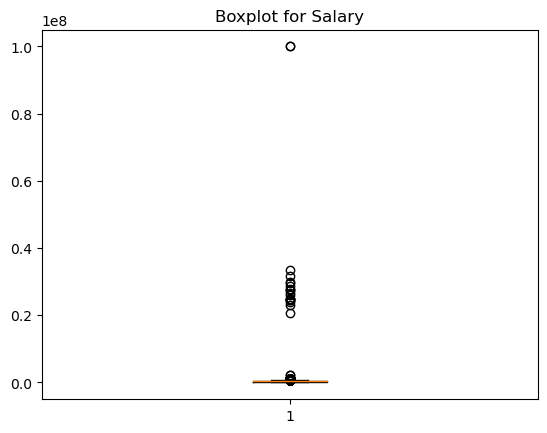

In [24]:
import matplotlib.pyplot as plt
plt.boxplot(df['Salary'].dropna())  # excluding the null values for plotting
plt.title('Boxplot for Salary')
plt.show()
#checking the spread

In [25]:
df.head(59)

,Id,SourceName,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,AnnualSalary
0,71593954,jobserve.com,Ruby on Rails Web Developer CONTRACT Online ...,London,NST Recruitment Limited,-,contract,IT Jobs,900000.0,31-03-2012 00:00:00,14-04-2012 00:00:00,900000.0
1,71335415,jobserve.com,Agile Data Engineer Big Data Central London,Central London,Oliver Bernard,-,contract,IT Jobs,900000.0,30-11-2013 15:00:00,14-12-2013 15:00:00,900000.0
2,71592855,jobserve.com,SAP Project Assistant Accountant,UK,ABW Recruitment,-,contract,IT Jobs,420000.0,08-04-2012 15:00:00,07-06-2012 15:00:00,420000.0
3,70248093,jobserve.com,C Senior Developer,Essex,Highams Recruitment,-,permanent,IT Jobs,415000.0,04-03-2012 12:00:00,02-06-2012 12:00:00,415000.0
4,70247297,jobserve.com,Web/Automated Tester,Horsforth,iSource IT,-,permanent,IT Jobs,300000.0,29-08-2012 00:00:00,28-09-2012 00:00:00,300000.0
5,71335326,jobserve.com,Risk Manager/Risk Consultant,Central London,TLP Consultancy,-,permanent,IT Jobs,675000.0,04-07-2013 12:00:00,02-10-2013 12:00:00,675000.0
6,71774452,jobserve.com,Data Architect Data Quality London,London,Alexander Ash Consulting Ltd,-,permanent,IT Jobs,850000.0,01-06-2013 12:00:00,30-08-2013 12:00:00,850000.0
7,71774549,jobserve.com,Informatica Developer Finance London,London,Radley James Ltd,-,permanent,IT Jobs,500000.0,01-04-2013 15:00:00,30-06-2013 15:00:00,500000.0
8,68495961,jobserve.com,KYC/AML Analyst,Swindon,Experis IT,-,contract,IT Jobs,NaN,11-09-2012 12:00:00,10-11-2012 12:00:00,NaN
9,68496556,jobserve.com,"Java J****EE Developer (Struts, JSP, HTML) Ch...",Handbridge,Evolution Recruitment Solutions Ltd,-,permanent,IT Jobs,400000.0,09-01-2013 15:00:00,08-02-2013 15:00:00,400000.0


......

## Saving data
Save the parsed and cleaned data as well as the error list, named as:
- \<student\_id\>_dataset1_solution.csv
- \<student\_id\>_errorlist.csv

In [26]:
# code to save output data
# Saving the dataframe to a CSV file
df.to_csv('s3970066_dataset1_solution.csv', index=False)

In [27]:
import pandas as pd

# 1. reading the existing error list
error_df = pd.read_csv('s3970066_errorlist.csv')

# 2. adding the 'Fixing' column based on the 'ErrorTyp' column as I forgot it before
def determine_fixing(error_type):
    if error_type == 'Date Format Fix':
        return 'Fixed by changing the Data Time format to another standard'
    elif error_type == 'Salary-mismatch':
        return 'by changing all the different salary types to per annum and the <NA> values to nan'
    else:
        return None

error_df['Fixing'] = error_df['ErrorTyp'].apply(determine_fixing)

# 3. saving the modified DataFrame back to the CSV
error_df.to_csv('s3970066_errorlist.csv', index=False)

print("s3970066_errorlist.csv has been updated!")


s3970066_errorlist.csv has been updated!


## Summary
I first fixed the Data and Time versions that are needed for our project along with the Salary Format. Most of them are in per hour, per week, or per month basis but for this cleaning, I ensured all of them are turned into Per annum.